In [4]:
import pandas as pd

df = pd.read_csv('train.csv')
print(df.head())  

  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True  


In [5]:
df_true = df[df['Transported'] == True]

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Transported=True만 필터링
df_true = df[df['Transported'] == True]


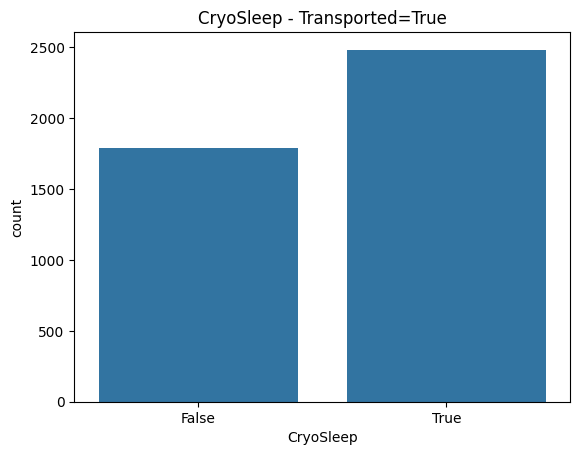

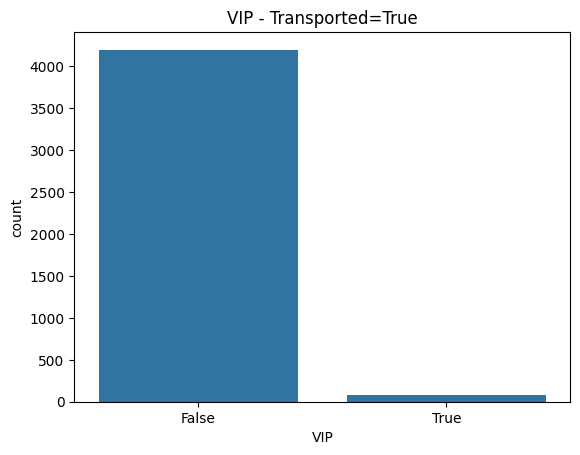

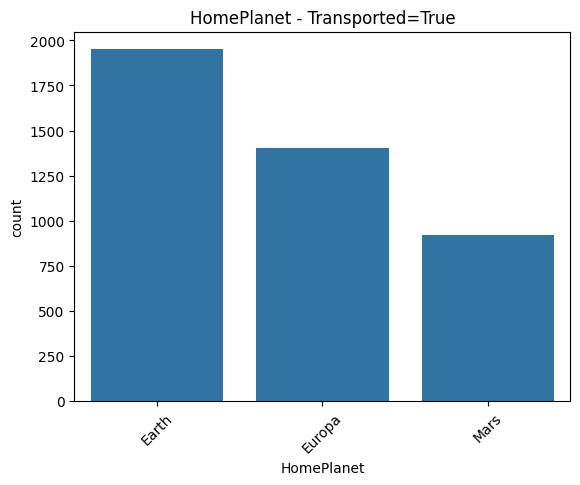

In [7]:
# 예: CryoSleep 값 분포
sns.countplot(x='CryoSleep', data=df_true)
plt.title('CryoSleep - Transported=True')
plt.show()

# 예: VIP 여부
sns.countplot(x='VIP', data=df_true)
plt.title('VIP - Transported=True')
plt.show()

# 예: HomePlanet
sns.countplot(x='HomePlanet', data=df_true)
plt.title('HomePlanet - Transported=True')
plt.xticks(rotation=45)
plt.show()

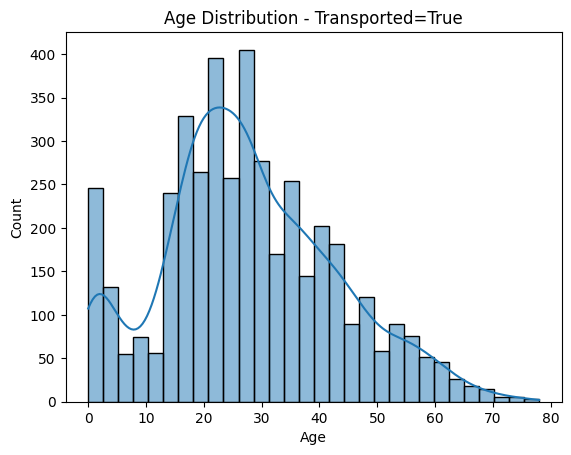

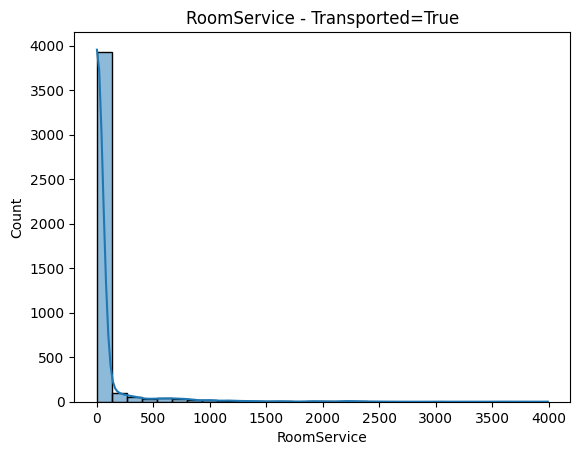

/var/folders/fb/j7kw_pln1199_q7yddbhnqyh0000gn/T/ipykernel_15750/2903678366.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_true['TotalSpend'] = df_true[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].sum(axis=1)


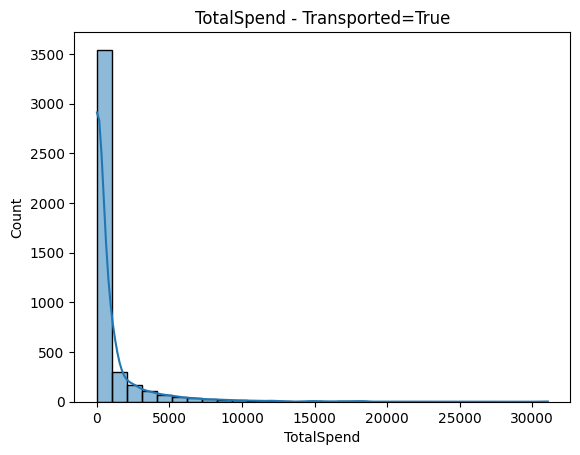

In [8]:
# 예: 나이 분포
sns.histplot(df_true['Age'], kde=True, bins=30)
plt.title('Age Distribution - Transported=True')
plt.show()

# 예: RoomService 소비 분포
sns.histplot(df_true['RoomService'], kde=True, bins=30)
plt.title('RoomService - Transported=True')
plt.show()

# 예: 여러 서비스 총합
df_true['TotalSpend'] = df_true[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].sum(axis=1)
sns.histplot(df_true['TotalSpend'], kde=True, bins=30)
plt.title('TotalSpend - Transported=True')
plt.show()

/var/folders/fb/j7kw_pln1199_q7yddbhnqyh0000gn/T/ipykernel_15750/3985937657.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_true[['Deck', 'CabinNum', 'Side']] = df_true['Cabin'].str.split('/', expand=True)
/var/folders/fb/j7kw_pln1199_q7yddbhnqyh0000gn/T/ipykernel_15750/3985937657.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_true[['Deck', 'CabinNum', 'Side']] = df_true['Cabin'].str.split('/', expand=True)
/var/folders/fb/j7kw_pln1199_q7yddbhnqyh0000gn/T/ipykernel_15750/3985937657.py:2: Sett

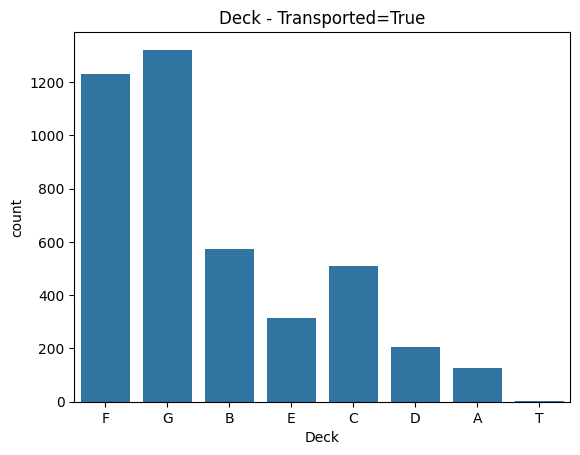

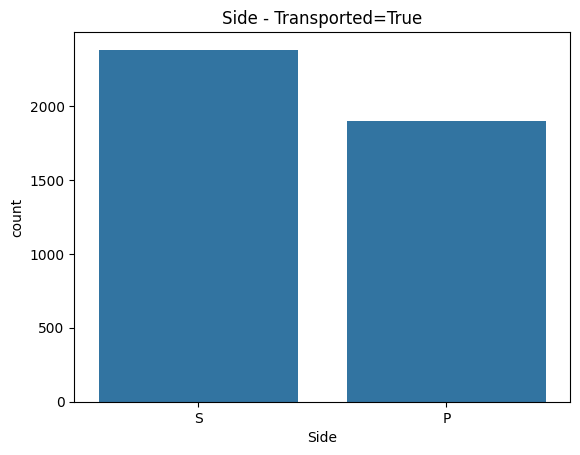

In [9]:
# Cabin 분해
df_true[['Deck', 'CabinNum', 'Side']] = df_true['Cabin'].str.split('/', expand=True)

# Deck 분포
sns.countplot(x='Deck', data=df_true)
plt.title('Deck - Transported=True')
plt.show()

# Side 분포
sns.countplot(x='Side', data=df_true)
plt.title('Side - Transported=True')
plt.show()

In [10]:
import pandas as pd

# RoomService가 0원이면 'NoSpend', 0초과면 'Spent'
df['SpentRoomService'] = (df['RoomService'] > 0).astype(int)

# 조건 조합별 Transported 비율 확인
result = df.groupby(['CryoSleep', 'SpentRoomService'])['Transported'].mean().reset_index()

# 보기 좋게 출력
print(result.pivot(index='CryoSleep', columns='SpentRoomService', values='Transported'))

SpentRoomService         0         1
CryoSleep                           
False             0.405049  0.260475
True              0.817583       NaN
